**Predicting Tennis matches results with Random Forest algorithm**

After understanding the dataset and how the tennis league I will try to predict the results of the matches.

In [1]:
# Import the packages I will need in the developemnt of my machine learning algorithm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import the data set I downloaded and uploaded to Kaggle ("Compact tennis dataset")
# After uploading and retrieve the file, I will ask teh program to output it's path, so that I will be able to import it.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/atp-tennis-2000-2023daily-pull/atp_tennis.csv


**Showing the data for the first time**

After importing the dataSet into my notebook, with the method .head() I will be able to show the first 5 rows of the DataSet, and in addittion, I will be able to take a look at the columns name, so that the develop of the algorithm will be easier.

Since I have imported many .csv files, I also need to specify which file to show.

In [2]:
matches = pd.read_csv("/kaggle/input/atp-tennis-2000-2023daily-pull/atp_tennis.csv")
matches.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


**Understand better the Shape of the Dataset**

After taking a first look at the DataSet we can take a look at the shape of it, which means how many column and rows the file actually have, in this case we start working on the DataSet when the overall shape of it it's going to be 61441 rows an 17 columns

In [3]:
# Shows how many columns and row are in the dataset
matches.shape

(63079, 17)

**Fixing the datatypes**

For most of machine algorithm to work, they must work with integers DataType, and the Random Forest also need. So we have to convert some of the DataType from object into integer, or into some kind of integers. First of all we have to check what DataType we have in our DataSet, then we can choose the Data we want to work with, and if they are not integers already we have to convert it.

In [4]:
# Check what DataType we have in our DataSet
matches["date"] = pd.to_datetime(matches["Date"])
matches.dtypes

Tournament            object
Date                  object
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Player_1              object
Player_2              object
Winner                object
Rank_1                 int64
Rank_2                 int64
Pts_1                  int64
Pts_2                  int64
Odd_1                float64
Odd_2                float64
Score                 object
date          datetime64[ns]
dtype: object

**Converting the Date type**

Here I decided to only convert the Date column, but in order to increase the accuracy, in the future more columns may be converted and used in thealgorithm

**Creating the Predictors**

In the Random Forest algorithm, predictors, also known as features or independent variables, are the variables used to make predictions. These predictors are the characteristics or attributes of the data that are input into the algorithm to train the model and subsequently used to make predictions on new, unseen data.

In the context of predicting tennis matches, our predictors will include various features related to the court type, ground type, opponent and player. Since we want to predict a new value based on the Input, we cannot use data that we dont know after the match, we cannot use the match result as predictor.

In [5]:
# Create a new column representing the Indoor or Outdoor value
matches["courtType"] = matches["Court"].astype("category").cat.codes

# Create a new column representing the kind of surface
matches["groundType"] = matches["Surface"].astype("category").cat.codes

# Create a new column representing a code for each opponent
matches["opponentCode"] = matches["Player_2"].astype("category").cat.codes

# Create a new column representing a code for each opponent
matches["playerCode"] = matches["Player_1"].astype("category").cat.codes


# Create a new column representing if the player1 won the game with a 1 or if it didn't with a 0
matches["target"] = (matches["Winner"] == matches["Player_1"]).astype("int")


**Showing the dataset content**

By just typing the name of the variable where I assigned the dataset we are able to have a look at all the data that are inside.

In [6]:
matches

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Pts_2,Odd_1,Odd_2,Score,date,courtType,groundType,opponentCode,playerCode,target
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,...,-1,-1.00,-1.00,6-4 6-2,2000-01-03,1,3,746,317,1
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,...,-1,-1.00,-1.00,3-6 3-6,2000-01-03,1,3,355,229,0
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,...,-1,-1.00,-1.00,6-7 7-5 6-3,2000-01-03,1,3,62,356,1
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,...,-1,-1.00,-1.00,1-6 4-6,2000-01-03,1,3,377,646,0
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,...,-1,-1.00,-1.00,7-6 5-7 6-4,2000-01-03,1,3,1395,403,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63074,Mallorca Championships,2024-06-27,ATP250,Outdoor,Grass,Quarterfinals,3,Ofner S.,Michelsen A.,Ofner S.,...,844,2.20,1.67,3-6 7-5 6-3,2024-06-27,1,2,849,951,1
63075,Mallorca Championships,2024-06-27,ATP250,Outdoor,Grass,Quarterfinals,3,Shelton B.,Jubb P.,Jubb P.,...,191,1.40,3.00,3-6 6-3 6-7,2024-06-27,1,2,599,1177,0
63076,Mallorca Championships,2024-06-28,ATP250,Outdoor,Grass,Semifinals,3,Tabilo A.,Monfils G.,Tabilo A.,...,1160,1.91,1.91,2-6 6-2 7-6,2024-06-28,1,2,874,1251,1
63077,Mallorca Championships,2024-06-28,ATP250,Outdoor,Grass,Semifinals,3,Jubb P.,Ofner S.,Ofner S.,...,883,2.10,1.73,4-6 5-7,2024-06-28,1,2,950,601,0


**Training the model**

As soon as our basic predictors are created and added to the DataSet, we are able to Train our model. Training is one of the most, if not the most important part of our machine learnig algorithm, in my case, I decided to use all the data until the year 2023 as Training Data, and all the Data after the 2023 as testing data.

**Random Forest algorithm**

During the training phase of the Random Forest algorithm, each decision tree is trained to predict the target variable (in this case, the outcome of the tennis match) based on the subset of predictors assigned to it. The algorithm determines the importance of each predictor by measuring how much it contributes to reducing the impurity or increasing the information gain in the decision tree.

When making predictions with the trained Random Forest model, the algorithm combines the predictions of all the decision trees by averaging (for regression problems) or voting (for classification problems) to generate the final prediction. Each decision tree contributes its own prediction based on the assigned subset of predictors, and the final prediction is determined by the collective wisdom of the entire ensemble.

In summary, predictors in the Random Forest algorithm are the input variables that capture the relevant information and characteristics of the data used to train the model. These predictors are used by individual decision trees within the ensemble to make predictions, and the algorithm combines the predictions of all the decision trees to produce the final prediction.

In [7]:
# Training the machine learning model 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 3, random_state = 1)

# Divide the dataset into train and test sections
conditionDate = matches['date'] > '2005-01-01'
conditionDate2 = matches['date'] < '2023-10-29'
combinedCondition = conditionDate & conditionDate2 
train = matches[combinedCondition]

test = matches[matches["date"] > '2023-10-29']

# A list of all the prdictors 
predictors = ["playerCode", "opponentCode", "Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2"]

# Fit the random forest model, fitting the predictors and trying to predict the target
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=3, n_estimators=200, random_state=1)

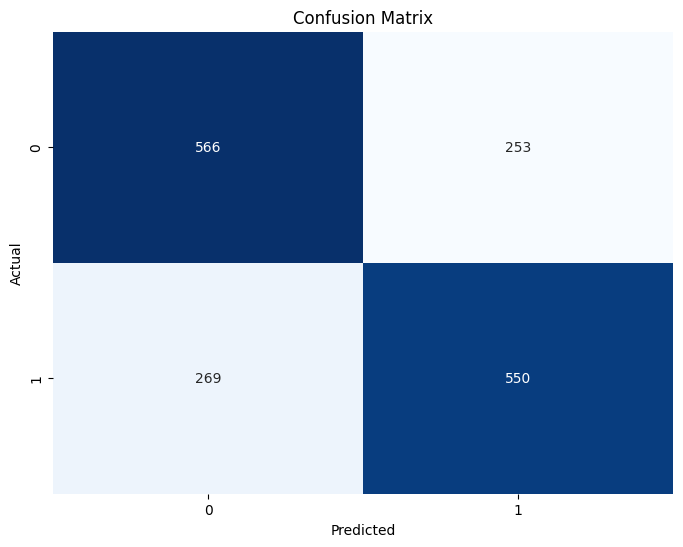

In [8]:
prediction = rf.predict(test[predictors])

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['target'], prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
probabilities = rf.predict_proba(test[predictors])
probabilities

array([[0.66666667, 0.33333333],
       [0.51083333, 0.48916667],
       [0.3997619 , 0.6002381 ],
       ...,
       [0.53741667, 0.46258333],
       [0.50441667, 0.49558333],
       [0.56708333, 0.43291667]])

**A brief explaination of the code above**

Here we call the function RandomForestClassifier by passing three important values. 

* The first is the number of estimators, which is the number of how many decision trees are created. 
* The second is the minimum samples split, which will tell the algorithm what is the minimum number of samples in a node in order to be split further. A small number can lead to overfitting. 

**Getting the players Features for the First prediction**

After we have all the predictors ready, we need to find out what's the actual ID of the player and the opponent, so that we can use those features to calculate our first prediction.

For now since I am getting the data from a dataset here on Kaggle, I have to manually insert the player name and the opponent name, In order to get the ID for both players. 

Since I want to make the prediction on both sides (By predicting the result when player 1 vs player 2, and player 2 vs player 1). I need to look for the ID of the players two times, since the player and opponent ID are not always the same

In [10]:
firstPlayer = "Murray A."
firstOpponent = "Paire B."

rows = matches.loc[matches["Player_1"] == firstPlayer, "playerCode"]
if not rows.empty:
    print("ID for PLAYER:", firstPlayer)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

rows = matches.loc[matches["Player_2"] == firstOpponent, "opponentCode"]
if not rows.empty:
    print("ID for OPPONENT:", firstOpponent)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

# Change the Player and opponent 
print(" ")
print("CHANGE OF PLAYERS")
print(" ")

secondPlayer = firstOpponent
secondOpponent = firstPlayer
    
rows = matches.loc[matches["Player_1"] == secondPlayer, "playerCode"]
if not rows.empty:
    print("ID for PLAYER:", secondPlayer)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

rows = matches.loc[matches["Player_2"] == secondOpponent, "opponentCode"]
if not rows.empty:
    print("ID for OPPONENT:", secondOpponent)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

ID for PLAYER: Murray A.
906
ID for OPPONENT: Paire B.
972
 
CHANGE OF PLAYERS
 
ID for PLAYER: Paire B.
975
ID for OPPONENT: Murray A.
901


**Getting the first prediction**

As soon as we know all the feature we need (predictors) we can use it to calculate the first prediction using the trained set. We will predict the result two times, where we will exchange the target from the first to the second player, if we get one win and one loose then we have more confidence on our prediction.

In [11]:
# First Data
firstPlayerCode = 892
firstOpponentCode = 954
firstPlayerRank = 49
firstPlayerPoints = 970
firstPlayerOdds = 1.30

# Second Data
secondPlayerCode = 959
secondOpponentCode = 885
secondPlayerRank = 112
secondPlayerPoints = 551
secondPlayerOdds = 2.60

firstData = {
    "playerCode": firstPlayerCode,
    "opponentCode": firstOpponentCode,
    "Rank_1": firstPlayerRank, 
    "Rank_2": secondPlayerRank, 
    "Pts_1": firstPlayerPoints, 
    "Pts_2": secondPlayerPoints, 
    "Odd_1": firstPlayerOdds, 
    "Odd_2": secondPlayerOdds
}

secondData = {
    "playerCode": secondPlayerCode,
    "opponentCode": secondOpponentCode,
    "Rank_1": secondPlayerRank, 
    "Rank_2": firstPlayerRank, 
    "Pts_1": secondPlayerPoints, 
    "Pts_2": firstPlayerPoints, 
    "Odd_1": secondPlayerOdds, 
    "Odd_2": firstPlayerOdds
}


# Convert firstData to a DataFrame with a single row
firstData_df = pd.DataFrame([firstData])
secondData_df = pd.DataFrame([secondData])

# Extract predictors in the same order as used during training
firstDataInput = firstData_df[predictors]
secondDataInput = secondData_df[predictors]

# Make predictions
prediction = rf.predict(firstDataInput)


# Make a prediction on the new data
print(f"{firstPlayer} win result is: {prediction[0]}")
prediction = rf.predict(secondDataInput)
print(f"{secondPlayer} win result is: {prediction[0]}")

Murray A. win result is: 1
Paire B. win result is: 0


In [12]:
probabilityPlayerOne = rf.predict_proba(firstDataInput)
print(f"{firstPlayer} probability is: {probabilityPlayerOne}")

probabilityPlayerTwo = rf.predict_proba(secondDataInput)
print(f"{secondPlayer} probability is: {probabilityPlayerTwo}")

Murray A. probability is: [[0.31458333 0.68541667]]
Paire B. probability is: [[0.7675 0.2325]]


In [13]:
probabilityPlayerOne.shape

(1, 2)

In [14]:
confidence = ((probabilityPlayerOne[0, 1] + probabilityPlayerTwo[0, 0]) / 2)
confidence

0.7264583333333332

**Getting the players Features for the Second prediction**

After we have all the predictors ready, we need to find out what's the actual ID of the player and the opponent, so that we can use those features to calculate our first prediction

**Accuracy**

Our first acccuracy is actually pretty good, but we have to remember that this accuracy isn't just the winning case accuracy, but it's going to reflect also the loose and draw case. We will have to chance the method of calculation for the accuracy

In [15]:
# Generate prediction, passing the test data and the predictors
preds = rf.predict(test[predictors])

# Need to describe the accuracy
from sklearn.metrics import accuracy_score

# Calculate the accuracy passing the test data, with the predictors and the prediction
acc = accuracy_score(test["target"], preds)

In [16]:
acc

0.6813186813186813